In [ ]:
import numpy as np
print('numpy: {}'.format(np.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import re
print('re: {}'.format(re.__version__))

import nltk
print('nltk: {}'.format(nltk.__version__))

import matplotlib.pyplot as plt

%matplotlib inline

numpy: 1.25.2
pandas: 1.5.3
re: 2.2.1
nltk: 3.8.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Capstone Project 9

import CAP9_1_AirLineTwitter_config
## Define root folder
root_folder = CAP9_1_AirLineTwitter_config.RootFolder
OutputFiles  = root_folder+"\OutputFiles"
print(OutputFiles)

df = pd.read_csv(OutputFiles+"/DataCleaning_SentimentCreation_df.csv")
print(df.shape)

Mounted at /content/drive
/content/drive/MyDrive/Capstone Project 9
C:/1-GG/Cap9/Airline Twitter Sentimet Analysis\Dataset\OutputFiles
(13806, 25)


In [ ]:
df['sentiment_vader'].value_counts()

positive    6187
negative    4160
neutral     3459
Name: sentiment_vader, dtype: int64

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone', 'sentiment_score',
       'sentiment_category', 'class', 'tweet_length',
       'Tweets_Without_Stop_Words', 'cleaned_text', 'tweet_created_str',
       'cleaned_text_ExpandedTweets', 'cleaned_text_lemmatized',
       'sentiment_vader', 'cleaned_text_english_only'],
      dtype='object')

In [ ]:
labels = df['sentiment_vader'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

import time

In [ ]:

# Find all NaN values in 'cleaned_text_lemmatized' column
nan_indices = df['cleaned_text_lemmatized'].isna()

# Count the number of NaN values
nan_count = nan_indices.sum()

# Print the number of NaN values
print("Number of NaN values in 'cleaned_text_lemmatized':", nan_count)

# Print the indices of rows with NaN values
print("Indices of rows with NaN values:", df[nan_indices].index.tolist())


Number of NaN values in 'cleaned_text_lemmatized': 33
Indices of rows with NaN values: [755, 1392, 1588, 2516, 3387, 3510, 3642, 3846, 4447, 5264, 5456, 5649, 6080, 6659, 6703, 7134, 7308, 7346, 8576, 8913, 9224, 10295, 10332, 10798, 10842, 10870, 11179, 11624, 11786, 11882, 12185, 12471, 12567]


In [ ]:
# Delete all rows with NaN values in 'cleaned_text_english_only' column
df.dropna(subset=['cleaned_text_lemmatized'], inplace=True)


In [ ]:

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the cleaned and lemmatized tweet text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text_lemmatized'])

# Convert the TF-IDF matrix to a DataFrame for easier manipulation (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Now you have a TF-IDF representation of your tweet dataset
# You can use tfidf_matrix or tfidf_df for further analysis


In [ ]:
tfidf_df

,aa,aaaand,aaalwayslate,aaba,aacom,aadavantage,aadelay,aadvantage,aafail,aal,...,zigzag,zip,zipper,zombie,zone,zoom,zrh,zukes,zurich,zurichnew
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get the mean TF-IDF score for each term across all tweets
term_mean_tfidf = tfidf_df.mean(axis=0)

# Sort terms by their mean TF-IDF score in descending order
sorted_terms = term_mean_tfidf.sort_values(ascending=False)

# Print the top 10 terms with the highest mean TF-IDF scores
print(sorted_terms.head(10))


get         0.025035
thanks      0.022621
hour        0.016985
thank       0.016852
cancel      0.015218
help        0.014846
service     0.014454
customer    0.013681
time        0.013629
flight      0.013616
dtype: float64


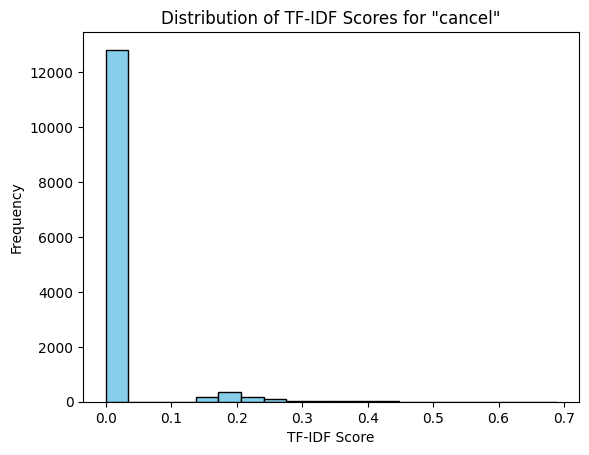

In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of TF-IDF scores for a specific term
term = 'cancel'
plt.hist(tfidf_df[term], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.title(f'Distribution of TF-IDF Scores for "{term}"')
plt.show()


In [ ]:
print(f"Volcabulary: ",tfidf_vectorizer.get_feature_names_out())


# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Define the file path where you want to save the feature names
file_path = "feature_names.txt"

# Write the feature names to the text file
with open(file_path, "w") as file:
    for feature_name in feature_names:
        file.write(feature_name + "\n")

Volcabulary:  ['aa' 'aaaand' 'aaalwayslate' ... 'zukes' 'zurich' 'zurichnew']


In [ ]:
import nltk
from nltk.corpus import words

# Download the NLTK words corpus
nltk.download('words')

# Get the set of English words from NLTK
english_words = set(words.words())

# Function to filter out non-English words from text
def filter_non_english_words(text):
    # Tokenize the text into words
    words = text.split()
    # Filter out non-English words
    english_words_only = [word for word in words if word.lower() in english_words]
    # Join the remaining English words back into a single string
    return ' '.join(english_words_only)

# Apply the function to filter out non-English words from the 'cleaned_text' column
df['cleaned_text_english_only'] = df['cleaned_text_lemmatized'].apply(filter_non_english_words)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
df['sentiment_vader']

0         neutral
1         neutral
2         neutral
3        negative
4        negative
           ...   
13801    positive
13802    negative
13803    positive
13804    positive
13805    positive
Name: sentiment_vader, Length: 13773, dtype: object

In [ ]:
pos_neg_df = df[df['sentiment_vader'] != 'neutral']

In [ ]:
pos_neg_df['cleaned_text_english_only']

3                                     really big bad thing
4        seriously would pay seat play really bad thing...
5               yes nearly every time fly ear worm go away
6        really miss prime opportunity men without hat ...
7                                                     well
                               ...                        
13801                                  thank get different
13802    leave minute late warning communication minute...
13803                              please bring blackberry
13804    money change answer phone suggestion make comm...
13805    people need know many seat next put u people next
Name: cleaned_text_english_only, Length: 10347, dtype: object

In [ ]:
# Assuming pos_neg_df is your DataFrame containing the 'sentiment_vader' column
# Map 'positive' to 1 and 'negative' to 0
pos_neg_df['sentiment_numeric'] = pos_neg_df['sentiment_vader'].map({'positive': 1, 'negative': 0})


<ipython-input-18-14df38d532cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_neg_df['sentiment_numeric'] = pos_neg_df['sentiment_vader'].map({'positive': 1, 'negative': 0})


In [ ]:
labels = pos_neg_df['sentiment_numeric'].values

In [ ]:

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the cleaned and lemmatized tweet text
tfidf_matrix = tfidf_vectorizer.fit_transform(pos_neg_df['cleaned_text_english_only'])

# Convert the TF-IDF matrix to a DataFrame for easier manipulation (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(f"Volcabulary: ",tfidf_vectorizer.get_feature_names_out())

# Get the mean TF-IDF score for each term across all tweets
term_mean_tfidf = tfidf_df.mean(axis=0)

# Sort terms by their mean TF-IDF score in descending order
sorted_terms = term_mean_tfidf.sort_values(ascending=False)

# Print the top 10 terms with the highest mean TF-IDF scores
print(sorted_terms.head(10))

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Define the file path where you want to save the feature names
file_path = "feature_names.txt"

# Write the feature names to the text file
with open(file_path, "w") as file:
    for feature_name in feature_names:
        file.write(feature_name + "\n")

Volcabulary:  ['aa' 'aal' 'abandon' ... 'zombie' 'zone' 'zoom']
thanks      0.031929
get         0.028859
thank       0.023898
cancel      0.022646
help        0.020895
hour        0.018607
service     0.018157
flight      0.017447
customer    0.017156
time        0.015496
dtype: float64


In [ ]:
labels = pos_neg_df['sentiment_numeric'].values
features = tfidf_matrix.toarray()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# Initialize logistic regression model
lr_model = LogisticRegression(max_iter=3000, penalty='l2')

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8864734299516909
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       818
           1       0.89      0.93      0.91      1252

    accuracy                           0.89      2070
   macro avg       0.89      0.87      0.88      2070
weighted avg       0.89      0.89      0.89      2070



In [ ]:
def getModelReportPerformance(modelName, yTest, yPredict) :
    accuracy = accuracy_score(yTest, yPredict)
    precision = precision_score(yTest, yPredict)
    recall = recall_score(yTest, yPredict)
    f1 = f1_score(yTest, yPredict)
    conf_matrix = confusion_matrix(yTest, yPredict)
    clf_report = classification_report(yTest, yPredict)
    tn, fp, fn, tp = confusion_matrix(yTest, yPredict).ravel()
    ### Calculate recall , precission , f1-score
    recall_1 = round(tp/(tp+fn),2)
    recall_0 = round(tn/(tn+fp),2)

    precision_1 = round(tp/(tp+fp),2)
    precision_0 = round(tn/(tn+fn),2)

    F1_score_1 = round(2*((precision_1*recall_1)/(precision_1+recall_1)),2)

    F1_score_0 = round(2*((precision_0*recall_0)/(precision_0+recall_0)),2)

    print('\n\n*************************************************************************************')
    print('FOR {0}:'.format(modelName))
    print('ACCURACY:', accuracy)
    print('F1 SCORE:', f1)
    print('CONFUSION MATRIX: ')
    print(conf_matrix)
    print('CLASSIFICATION REPORT: ')
    print(clf_report)
    print('****************************************************************************************')



    return recall_1,recall_0,precision_1,precision_0,F1_score_1,F1_score_0

In [ ]:
def getReport(datanature , models, X_train, y_train,X_val, yTest) :

    accuracy_train = []
    accuracy_val = []
    lList = []
    #prefix  = 'CV_'
    prefix = datanature
    for model in models:
        start_time = time.time()
        mod = model
        #print( str(model))
        mod.fit(X_train, y_train)
        y_pred_train = mod.predict(X_train)
        y_pred_val = mod.predict(X_val)
        recall_1,recall_0,precision_1,precision_0,F1_score_1,F1_score_0 = getModelReportPerformance(mod, yTest, y_pred_val)
        plot_roc_curve(mod,yTest, y_pred_val)


        AUC = roc_auc_score(yTest,y_pred_val)
        accuracy_train= accuracy_score(y_train, y_pred_train)

        accuracy_val = accuracy_score(yTest, y_pred_val)

        string = str(model)
        model_names = string[:string.index("(")] # Remove '('
        model_names = prefix + model_names

        # Record the end time
        end_time = time.time()

        # Calculate the elapsed time
        elapsed_time = end_time - start_time

        print("Total time taken to run the model :", elapsed_time, "seconds")
        List=[model_names,accuracy_train,accuracy_val,
                    precision_0 , precision_1,
                    recall_0,recall_1,
                    F1_score_0,F1_score_1,
                    AUC, elapsed_time]
        lList.append(List)
    return lList

        # # Open our existing CSV file in append mode
        # # Create a file object for this file
        # with open(OutputFiles+'\SKModelEvalModel.csv', 'a' , newline='') as f_object:

        #     # Pass this file object to csv.writer()
        #     # and get a writer object
        #     writer_object = writer(f_object)

        #     # Pass the list as an argument into
        #     # the writerow()
        #     writer_object.writerow(List)


        #     #Close the file object
        #     f_object.close()

        # ## Save Model
        # #string = str(model)
        # print(string)
        # #model_names = string[:string.index("(")]
        # file_name = ModelSaveFolder+'/'+model_names+'_pickle'
        # pickle.dump(model, open(file_name,'wb'))

In [ ]:
Model_accuracy = {}

In [ ]:
def plot_roc_curve(model, yTest, yPred):
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    roc_auc = auc(fpr, tpr)
    lw = 2
    #print('AUC area:', roc_auc)
    Model_accuracy[model] = roc_auc_score(yTest,yPred)
    print('AUC roc_auc_score:', roc_auc_score(yTest,yPred))
    plt.plot([0,1],[0,1],'k--')
    #plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(model)
    plt.show()




def getModelReport(modelName, yTest, yPredict) :
    accuracy = accuracy_score(yTest, yPredict)
    precision = precision_score(yTest, yPredict, pos_label='positive')
    recall = recall_score(yTest, yPredict)
    f1 = f1_score(yTest, yPredict,average=None)
    conf_matrix = confusion_matrix(yTest, yPredict)
    clf_report = classification_report(yTest, yPredict)


    print('\n\n*************************************************************************************')
    print('FOR {0}:'.format(modelName))
    print('ACCURACY:', accuracy)
    print('F1 SCORE:', f1)
    print('CONFUSION MATRIX: ')
    print(conf_matrix)
    print('CLASSIFICATION REPORT: ')
    print(clf_report)
    print('****************************************************************************************')

    # Plotting AUC ROC Curve
    fpr, tpr, thresholds = roc_curve(yTest, yPredict)
    roc_auc = auc(fpr, tpr)
    lw = 2
    #print('AUC area:', roc_auc)
    Model_accuracy[modelName] = roc_auc_score(yTest,yPredict)
    print('AUC roc_auc_score:', roc_auc_score(yTest,yPredict))
    plt.plot([0,1],[0,1],'k--')
    #plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(modelName)
    plt.show()

    F10=f1[0]
    F11=f1[1]



In [ ]:
modelList = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), AdaBoostClassifier(),
          GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier(), LinearSVC()]

# 0 is negative tweet
# 1 is positive tweet

In [ ]:
import time ## - To set timer

In [ ]:
y_test

array([1, 0, 1, ..., 1, 1, 1])



*************************************************************************************
FOR LogisticRegression():
ACCURACY: 0.8864734299516909
F1 SCORE: 0.9083820662768031
CONFUSION MATRIX: 
[[ 670  148]
 [  87 1165]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       818
           1       0.89      0.93      0.91      1252

    accuracy                           0.89      2070
   macro avg       0.89      0.87      0.88      2070
weighted avg       0.89      0.89      0.89      2070

****************************************************************************************
AUC roc_auc_score: 0.8747910433770514


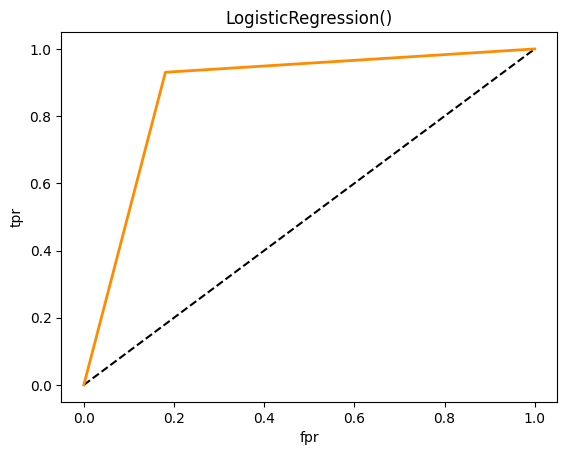

Total time taken to run the model : 2.391084671020508 seconds


*************************************************************************************
FOR DecisionTreeClassifier():
ACCURACY: 0.8077294685990338
F1 SCORE: 0.8382113821138211
CONFUSION MATRIX: 
[[ 641  177]
 [ 221 1031]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       818
           1       0.85      0.82      0.84      1252

    accuracy                           0.81      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.81      0.81      0.81      2070

****************************************************************************************
AUC roc_auc_score: 0.8035505050110532


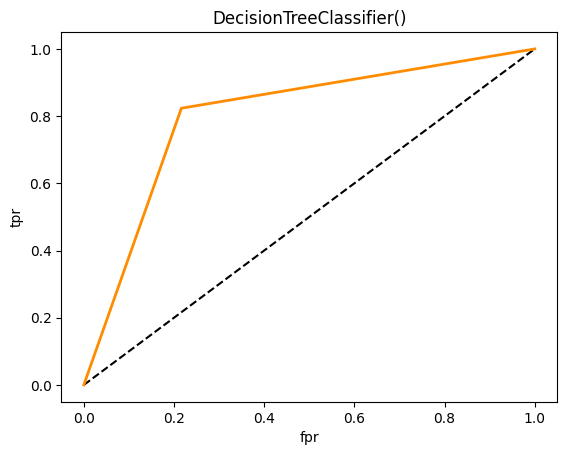

Total time taken to run the model : 13.19615626335144 seconds


*************************************************************************************
FOR RandomForestClassifier():
ACCURACY: 0.8647342995169082
F1 SCORE: 0.8896769109535068
CONFUSION MATRIX: 
[[ 661  157]
 [ 123 1129]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       818
           1       0.88      0.90      0.89      1252

    accuracy                           0.86      2070
   macro avg       0.86      0.85      0.86      2070
weighted avg       0.86      0.86      0.86      2070

****************************************************************************************
AUC roc_auc_score: 0.8549128240780521


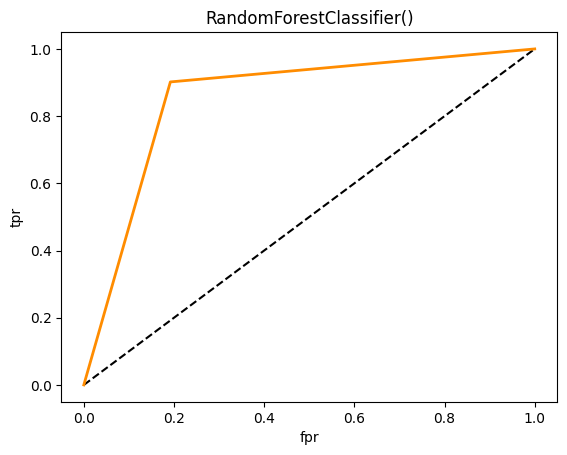

Total time taken to run the model : 29.56759214401245 seconds


*************************************************************************************
FOR GaussianNB():
ACCURACY: 0.5183574879227053
F1 SCORE: 0.4179801517805021
CONFUSION MATRIX: 
[[715 103]
 [894 358]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.44      0.87      0.59       818
           1       0.78      0.29      0.42      1252

    accuracy                           0.52      2070
   macro avg       0.61      0.58      0.50      2070
weighted avg       0.65      0.52      0.49      2070

****************************************************************************************
AUC roc_auc_score: 0.5800128107985658


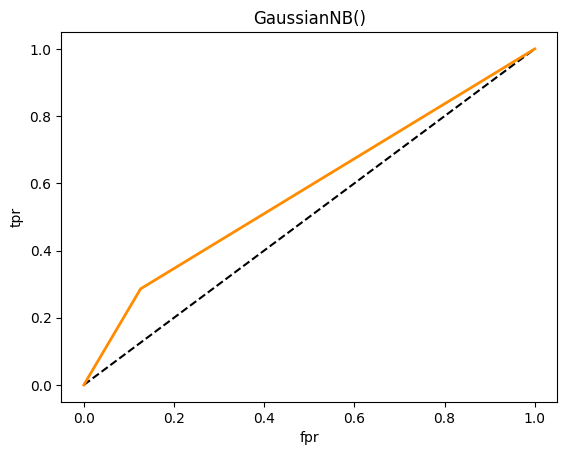

Total time taken to run the model : 1.766416072845459 seconds


*************************************************************************************
FOR AdaBoostClassifier():
ACCURACY: 0.8072463768115942
F1 SCORE: 0.8547506370586094
CONFUSION MATRIX: 
[[ 497  321]
 [  78 1174]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.86      0.61      0.71       818
           1       0.79      0.94      0.85      1252

    accuracy                           0.81      2070
   macro avg       0.82      0.77      0.78      2070
weighted avg       0.82      0.81      0.80      2070

****************************************************************************************
AUC roc_auc_score: 0.7726395713069358


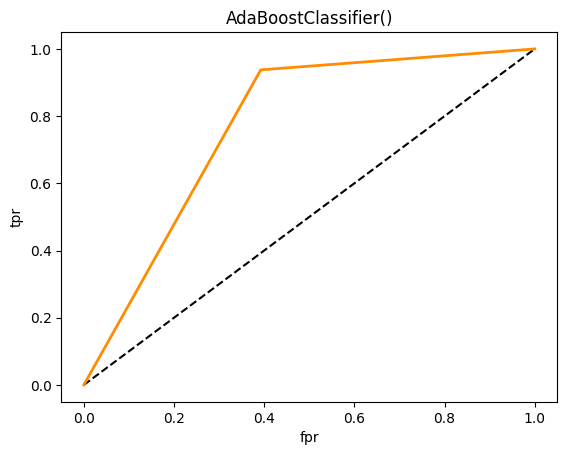

Total time taken to run the model : 38.189204454422 seconds


*************************************************************************************
FOR GradientBoostingClassifier():
ACCURACY: 0.8164251207729468
F1 SCORE: 0.8617176128093159
CONFUSION MATRIX: 
[[ 506  312]
 [  68 1184]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.88      0.62      0.73       818
           1       0.79      0.95      0.86      1252

    accuracy                           0.82      2070
   macro avg       0.84      0.78      0.79      2070
weighted avg       0.83      0.82      0.81      2070

****************************************************************************************
AUC roc_auc_score: 0.7821344040244654


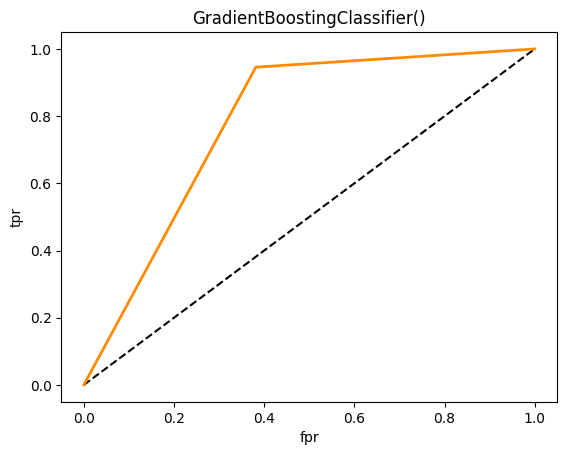

Total time taken to run the model : 134.49189829826355 seconds


*************************************************************************************
FOR KNeighborsClassifier():
ACCURACY: 0.5666666666666667
F1 SCORE: 0.4701712935617248
CONFUSION MATRIX: 
[[775  43]
 [854 398]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.48      0.95      0.63       818
           1       0.90      0.32      0.47      1252

    accuracy                           0.57      2070
   macro avg       0.69      0.63      0.55      2070
weighted avg       0.73      0.57      0.53      2070

****************************************************************************************
AUC roc_auc_score: 0.6326620683190515


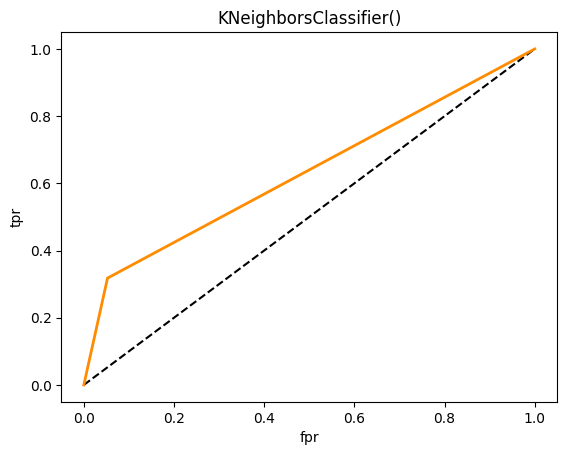

Total time taken to run the model : 26.683622121810913 seconds


*************************************************************************************
FOR XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
ACCURACY: 0.866183574879227
F1 SCORE: 0.8924271844660194
CONFUSION MATRIX: 
[[ 644  17

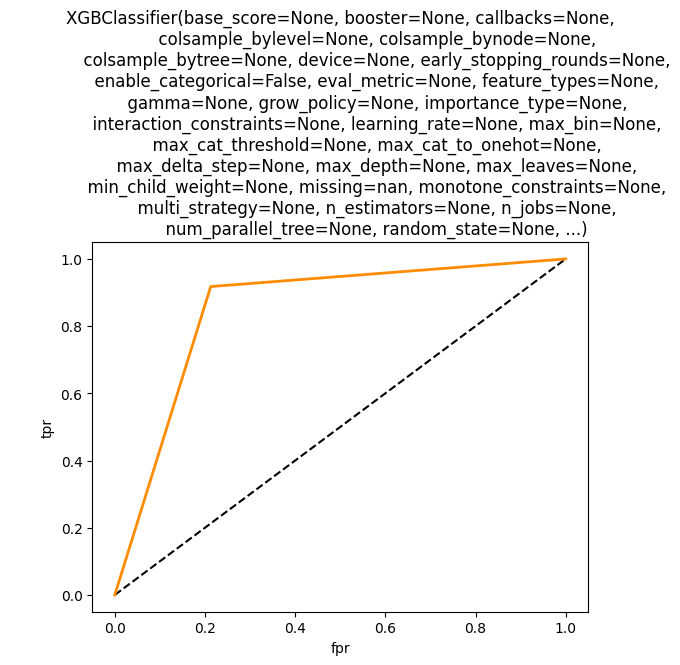

Total time taken to run the model : 12.247537612915039 seconds


*************************************************************************************
FOR LinearSVC():
ACCURACY: 0.9115942028985508
F1 SCORE: 0.9274097580325267
CONFUSION MATRIX: 
[[ 718  100]
 [  83 1169]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       818
           1       0.92      0.93      0.93      1252

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070

****************************************************************************************
AUC roc_auc_score: 0.9057283407672418


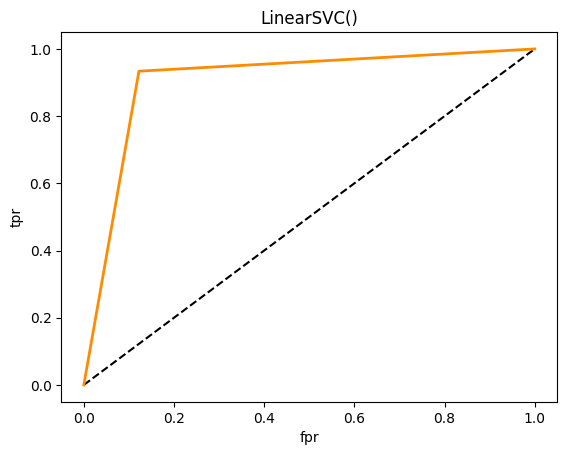

Total time taken to run the model : 0.5492215156555176 seconds
CPU times: user 4min 36s, sys: 7.18 s, total: 4min 43s
Wall time: 4min 19s


In [ ]:
%%time
result = getReport('Default_', modelList, X_train, y_train,X_test, y_test)

In [ ]:
print(f"FINAL RESULT: {result}")

FINAL RESULT: [['Default_LogisticRegression', 0.9287181345898272, 0.8864734299516909, 0.89, 0.89, 0.82, 0.93, 0.85, 0.91, 0.8747910433770514, 2.391084671020508], ['Default_DecisionTreeClassifier', 0.9984293826265556, 0.8077294685990338, 0.74, 0.85, 0.78, 0.82, 0.76, 0.83, 0.8035505050110532, 13.19615626335144], ['Default_RandomForestClassifier', 0.9984293826265556, 0.8647342995169082, 0.84, 0.88, 0.81, 0.9, 0.82, 0.89, 0.8549128240780521, 29.56759214401245], ['Default_GaussianNB', 0.6432282227860335, 0.5183574879227053, 0.44, 0.78, 0.87, 0.29, 0.58, 0.42, 0.5800128107985658, 1.766416072845459], ['Default_AdaBoostClassifier', 0.8088679473239097, 0.8072463768115942, 0.86, 0.79, 0.61, 0.94, 0.71, 0.86, 0.7726395713069358, 38.189204454422], ['Default_GradientBoostingClassifier', 0.828077805968346, 0.8164251207729468, 0.88, 0.79, 0.62, 0.95, 0.73, 0.86, 0.7821344040244654, 134.49189829826355], ['Default_KNeighborsClassifier', 0.9679835689259394, 0.5666666666666667, 0.48, 0.9, 0.95, 0.32, 0.

In [ ]:
# Sort the data based on accuracy_val (index 9) in descending order
sorted_data = sorted(result, key=lambda x: x[9], reverse=True)

# Get top 3 models
top_3_models = sorted_data[:3]

llist = []

# Print top 3 models
for i, model in enumerate(top_3_models, start=1):
    print(f"Top {i} Model: {model[0]}")
    llist.append(model[0].replace("Default_", ""))

Top 1 Model: Default_LinearSVC
Top 2 Model: Default_LogisticRegression
Top 3 Model: Default_RandomForestClassifier


In [ ]:
llist

['LinearSVC', 'LogisticRegression', 'RandomForestClassifier']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
best_model_list = []
for model_name in llist:
  # Define the hyperparameters grid


  labels = pos_neg_df['sentiment_numeric'].values
  features = tfidf_matrix.toarray()

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

  if model_name == 'LinearSVC':
    param_grid = {
      'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
      'loss': ['hinge', 'squared_hinge'],  # Loss function
      'max_iter': [40000, 50000, 60000]  # Maximum number of iterations
    }
    svm_model = LinearSVC()
  elif model_name == 'LogisticRegression':

    param_grid = {
      'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
      'penalty': ['l1', 'l2'],  # Loss function
      'max_iter': [40000, 50000, 60000]  # Maximum number of iterations
    }
    svm_model = LogisticRegression()
  else:
    param_grid = {
      'criterion': ['gini', 'entropy', 'log_loss']
    }

    svm_model = RandomForestClassifier()

  # Initialize grid search cross-validation
  grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

  # Perform grid search cross-validation
  grid_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = grid_search.best_params_
  print("Best Hyperparameters:", best_params)

  # Get the best model
  best_model = grid_search.best_estimator_

  # Evaluate the best model on the test set
  test_accuracy = best_model.score(X_test, y_test)
  print("Test Accuracy:", test_accuracy)
  best_model_list.append((model_name, test_accuracy))


Best Hyperparameters: {'C': 1, 'loss': 'squared_hinge', 'max_iter': 40000}
Test Accuracy: 0.9115942028985508


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Best Hyperparameters: {'C': 10, 'max_iter': 40000, 'penalty': 'l2'}
Test Accuracy: 0.908695652173913
Best Hyperparameters: {'criterion': 'entropy'}
Test Accuracy: 0.8690821256038648


In [ ]:
best_model_list

[('LinearSVC', 0.9115942028985508),
 ('LogisticRegression', 0.908695652173913),
 ('RandomForestClassifier', 0.8690821256038648)]

In [ ]:
modelList = [ LinearSVC(C=1.0, loss='squared_hinge', max_iter=40000)]



*************************************************************************************
FOR LinearSVC(max_iter=40000):
ACCURACY: 0.9115942028985508
F1 SCORE: 0.9274097580325267
CONFUSION MATRIX: 
[[ 718  100]
 [  83 1169]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       818
           1       0.92      0.93      0.93      1252

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070

****************************************************************************************
AUC roc_auc_score: 0.9057283407672418


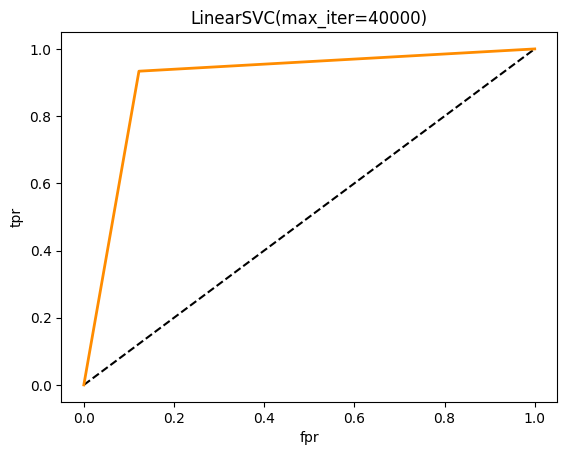

Total time taken to run the model : 0.5314600467681885 seconds


[['Default_LinearSVC',
  0.9737827715355806,
  0.9115942028985508,
  0.9,
  0.92,
  0.88,
  0.93,
  0.89,
  0.92,
  0.9057283407672418,
  0.5314600467681885]]

In [ ]:
getReport('Default_', modelList, X_train, y_train,X_test, y_test)

# Finalised model: LinearSVC(C=1.0, loss='squared_hinge', max_iter=40000)

In [ ]:
pos_neg_df = df[df['sentiment_vader'] != 'neutral']

In [ ]:
pos_neg_df['cleaned_text_english_only']

3                                     really big bad thing
4        seriously would pay seat play really bad thing...
5               yes nearly every time fly ear worm go away
6        really miss prime opportunity men without hat ...
7                                                     well
                               ...                        
13801                                  thank get different
13802    leave minute late warning communication minute...
13803                              please bring blackberry
13804    money change answer phone suggestion make comm...
13805    people need know many seat next put u people next
Name: cleaned_text_english_only, Length: 10347, dtype: object

In [ ]:

# Find all NaN values in 'cleaned_text_english_only' column
nan_indices = pos_neg_df['cleaned_text_english_only'].isna()

# Count the number of NaN values
nan_count = nan_indices.sum()

# Print the number of NaN values
print("Number of NaN values in 'cleaned_text_english_only':", nan_count)

# Print the indices of rows with NaN values
print("Indices of rows with NaN values:", pos_neg_df[nan_indices].index.tolist())


Number of NaN values in 'cleaned_text_english_only': 0
Indices of rows with NaN values: []


In [ ]:
# Delete all rows with NaN values in 'cleaned_text_english_only' column
pos_neg_df.dropna(subset=['cleaned_text_english_only'], inplace=True)


<ipython-input-40-86b0ee681e7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_neg_df.dropna(subset=['cleaned_text_english_only'], inplace=True)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_df=0.5 ,min_df=1,  max_features=3000)

# Fit the vectorizer on the cleaned and lemmatized tweet text
tfidf_matrix = tfidf_vectorizer.fit_transform(pos_neg_df['cleaned_text_english_only'])

# Convert the TF-IDF matrix to a DataFrame for easier manipulation (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(f"Volcabulary: ",tfidf_vectorizer.get_feature_names_out())

# Get the mean TF-IDF score for each term across all tweets
term_mean_tfidf = tfidf_df.mean(axis=0)

# Sort terms by their mean TF-IDF score in descending order
sorted_terms = term_mean_tfidf.sort_values(ascending=False)

# Print the top 10 terms with the highest mean TF-IDF scores
print(sorted_terms.head(10))

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()


labels = pos_neg_df['sentiment_vader'].values
# pos_neg_df


features = tfidf_matrix.toarray()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# Initialize logistic regression model
lr_model = LinearSVC(C=1.0, loss='squared_hinge', max_iter=40000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

k = 1000  # Example: Select top 1000 features
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(tfidf_df, labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.2, random_state=0)

# Initialize logistic regression model
lr_model = LinearSVC(C=1.0, loss='squared_hinge', max_iter=40000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print('CONFUSSION MATRIX: ')
print(conf_matrix)




Volcabulary:  ['aa' 'aal' 'abandon' ... 'zipper' 'zombie' 'zone']
thanks      0.032320
get         0.029310
thank       0.024160
cancel      0.022931
help        0.021114
hour        0.018799
service     0.018495
flight      0.017691
customer    0.017474
time        0.015734
dtype: float64
Accuracy: 0.9082125603864735
Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88       818
    positive       0.92      0.93      0.92      1252

    accuracy                           0.91      2070
   macro avg       0.90      0.90      0.90      2070
weighted avg       0.91      0.91      0.91      2070

Accuracy: 0.9188405797101449
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90       818
    positive       0.92      0.94      0.93      1252

    accuracy                           0.92      2070
   macro avg       0.92      0.91      0.91      2070
weight

In [ ]:
y_test_numeric = [1 if label == 'positive' else 0 for label in y_test]
y_pred_numeric = [1 if label == 'positive' else 0 for label in y_pred]

In [ ]:
# Compute ROC AUC score
roc_auc = roc_auc_score(y_test_numeric, y_pred_numeric)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9119306420241062


# Finalised model: LinearSVC(C=1.0, loss='squared_hinge', max_iter=40000)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_df=0.5, min_df=1, max_features=4407)

# Fit the vectorizer on the cleaned and lemmatized tweet text
tfidf_matrix = tfidf_vectorizer.fit_transform(pos_neg_df['cleaned_text_english_only'])

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Select top k features using chi-square test
k = 4407  # Example: Select top 1000 features
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(tfidf_matrix, labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.2, random_state=0)

# Initialize logistic regression model
lr_model = LinearSVC(C=1.0, loss='squared_hinge', max_iter=40000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

y_test_numeric = [1 if label == 'positive' else 0 for label in y_test]
y_pred_numeric = [1 if label == 'positive' else 0 for label in y_pred]
# Compute ROC AUC score
roc_auc = roc_auc_score(y_test_numeric, y_pred_numeric)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9115942028985508
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89       818
    positive       0.92      0.93      0.93      1252

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070

Confusion Matrix:
[[ 718  100]
 [  83 1169]]
ROC AUC Score: 0.9057283407672418


In [ ]:
import pickle

# Save the trained model to a file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

In [ ]:
import joblib

model_file_path = "model.pkl"
joblib.dump(lr_model, model_file_path)

vectorizer_file_path = "vectorizer.pkl"
joblib.dump(tfidf_vectorizer, vectorizer_file_path)

['vectorizer.pkl']

In [ ]:
# Load the trained model from the file
with open('final_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
tweet_texts = [
    "I love the new update! It's amazing! #excited",
    "This product is terrible. I regret buying it. #disappointed"
]

In [ ]:
preprocessed_texts = tweet_texts

In [ ]:
# Convert the preprocessed tweet texts into TF-IDF features
tfidf_features = tfidf_vectorizer.transform(preprocessed_texts)

# Make predictions using the loaded model
predictions = lr_model.predict(tfidf_features)

# Print the predictions
for tweet_text, prediction in zip(tweet_texts, predictions):
    print(f"Tweet: {tweet_text}")
    print(f"Predicted Sentiment: {prediction}")

Tweet: I love the new update! It's amazing! #excited
Predicted Sentiment: positive
Tweet: This product is terrible. I regret buying it. #disappointed
Predicted Sentiment: negative
